<a href="https://colab.research.google.com/github/wjdgoruds2/Machine_Learning/blob/main/KNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[15  0  0]
 [ 0 15  1]
 [ 0  1 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



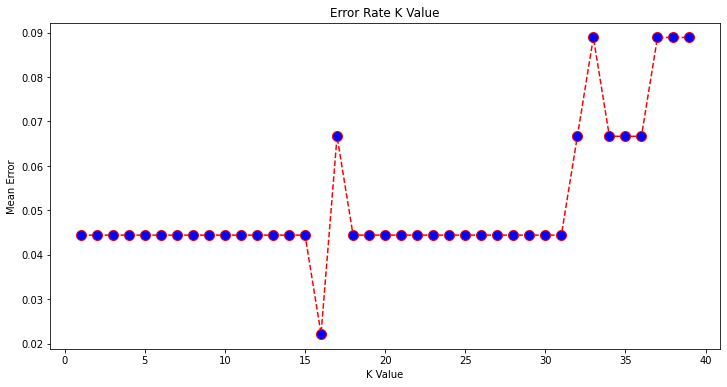

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

iris=datasets.load_iris()
X=iris.data
y=iris.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
error=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()